In [55]:
import numpy as np
import matplotlib.pyplot as plt

import OGRePy as gr
# import sympy as sp
from scipy.integrate import solve_ivp

1. The effective potential, analytically and plots it vs r

2. The maxima/minima if the effective potential for both null and timelike cases; then use that to compute these extrema for the Schwarzschild metric

3. The orbits by (in most cases only numerical solutions can be found)

    3a) Finding dphi/dr from Eq. (10) 

    3b) solving it to find r(phi) or phi(r) and plotting it using polar plot method to get the orbits
    
    3c) repeat the above method but now solve (4) and (5) for r(t) and phi(t) and plot them using the method of parametric plot (the common parameter of the two functions is t of course)

# Defining the General Metric

In [12]:
from OGRePy.abc import t, phi, theta

# define a nonnegative r
r = gr.sym("r", nonnegative=True)

# Define the coordinate system
Spherical = gr.Coordinates(t, r, theta, phi)

# Define the metric functions 
f = gr.func("f")(r)
g = gr.func("g")(r)
h = gr.func("h")(r)

# define the metric
metric = gr.Metric(
    coords=Spherical, 
    components=gr.diag(
        -f, 
        g, 
        h, 
        h * gr.s.sin(theta)**2
    )
)

metric.show()

$$g{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}- f & 0 & 0 & 0\\0 & g & 0 & 0\\0 & 0 & h & 0\\0 & 0 & 0 & h \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

In [13]:
~metric

$$\begin{align*}
    g{}_{t}{}_{t} &= - f \\
    g{}_{r}{}_{r} &= g \\
    g{}_{\theta}{}_{\theta} &= h \\
    g{}_{\phi}{}_{\phi} &= h \sin^{2}{\left(\theta \right)} 
\end{align*}$$

In [14]:
metric.line_element()

\mathrm{d}\phi**2*h(r)*sin(\theta)**2 + \mathrm{d}\theta**2*h(r) + \mathrm{d}r**2*g(r) - \mathrm{d}t**2*f(r)

# The Effective Potential

In [15]:
sigma = gr.sym("sigma")
L = gr.sym("L")

Veff = f * ( sigma - L**2 / h)

Veff

(-L**2/h(r) + \sigma)*f(r)

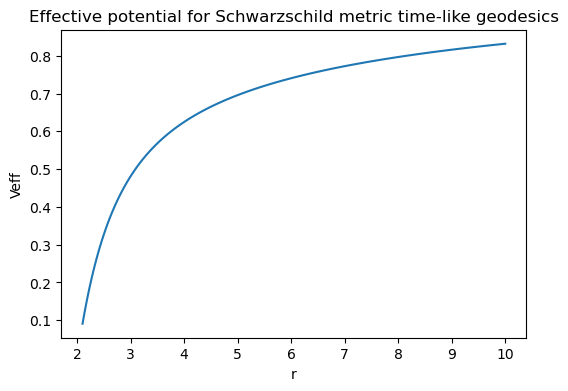

In [16]:
# Plotting the effective potential for the Swartzchild metric 
M = 1
f = 1 - 2*M/r
h = r**2

Veff = f * ( sigma - (L**2 / h))

Veff_func = gr.s.lambdify((r, sigma, L), Veff, "numpy") 

# params 
sigma_val = -1 # time-like geodesics
L_val = 2
r_val = np.geomspace(2.1, 10, 100)

Veff_vals = -Veff_func(r_val, sigma_val, L_val)

plt.figure(figsize=(6, 4))
plt.plot(r_val, Veff_vals)
plt.xlabel("r")
plt.ylabel("Veff")
plt.title("Effective potential for Schwarzschild metric time-like geodesics")
plt.show()


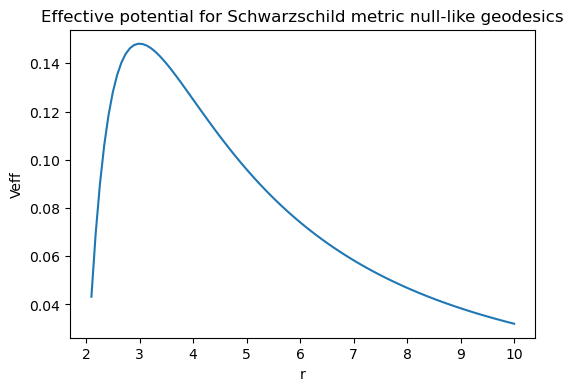

In [17]:
# Plotting the effective potential for the Swartzchild metric 
M = 1
f = 1 - 2*M/r
h = r**2

Veff = f * ( sigma - ( L**2 / h ))

Veff_func = gr.s.lambdify((r, sigma, L), Veff, "numpy") 

# params 
sigma_val = 0 # null-like geodesics
L_val = 2
r_val = np.linspace(2.1, 10, 100)

Veff_vals = -Veff_func(r_val, sigma_val, L_val)

plt.figure(figsize=(6, 4))
plt.plot(r_val, Veff_vals)
plt.xlabel("r")
plt.ylabel("Veff")
plt.title("Effective potential for Schwarzschild metric null-like geodesics")
plt.show()

# Extrema for Schwartzchild metric

In [8]:
Veff

(1 - 2/r)*(-L**2/r**2 + \sigma)

In [9]:
# first for null geodesics
sigma = gr.sym("sigma")
L = gr.sym("L")

Veff = -f * ( sigma - L**2 / h)

dVeff_dr = gr.s.diff(Veff, r).subs(sigma, 0)

print(dVeff_dr.simplify())

extrema = gr.s.solve(dVeff_dr, r)

print('Extrema: ', extrema)

2*L**2*(3 - r)/r**4
Extrema:  [3]


In [10]:
# time-like geodesics
sigma = gr.sym("sigma")
L = gr.sym("L")

Veff = -f * ( sigma - L**2 / h)

dVeff_dr = gr.s.diff(Veff, r).subs(sigma, 1)

print(dVeff_dr.simplify())

extrema = gr.s.solve(dVeff_dr, r)

print('Extrema: ', extrema)

2*(-L**2*r + 3*L**2 - r**2)/r**4
Extrema:  [L*(-L - sqrt(L**2 + 12))/2, L*(-L + sqrt(L**2 + 12))/2]


# Orbits

In [28]:
# define a nonnegative r
r = gr.sym("r", nonnegative=True)

# Define the coordinate system
Spherical = gr.Coordinates(t, r, theta, phi)

# Define the metric functions 
f = gr.func("f")(r)
g = gr.func("g")(r)
h = gr.func("h")(r)

# define the metric
metric = gr.Metric(
    coords=Spherical, 
    components=gr.diag(
        -f, 
        g, 
        h, 
        h * gr.s.sin(theta)**2
    )
)

metric.show()

$$g{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}- f & 0 & 0 & 0\\0 & g & 0 & 0\\0 & 0 & h & 0\\0 & 0 & 0 & h \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

In [34]:
# Get the Langrangian from the metric 
metric.lagrangian().list()

$$\begin{align*}
    L &= \dot{\phi}^{2} h \sin^{2}{\left(\theta \right)} + \dot{\theta}^{2} h + \dot{r}^{2} g - \dot{t}^{2} f 
\end{align*}$$

In [23]:
metric.geodesic_from_lagrangian()

$$0{}^{\mu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}- \partial_{\lambda} \left(- \dot{t} f\right)\\\frac{\dot{\phi}^{2} \partial_{r} h \sin^{2}{\left(\theta \right)}}{2} + \frac{\dot{\theta}^{2} \partial_{r} h}{2} + \frac{\dot{r}^{2} \partial_{r} g}{2} - \frac{\dot{t}^{2} \partial_{r} f}{2} - \partial_{\lambda} \left(\dot{r} g\right)\\\frac{\dot{\phi}^{2} h \sin{\left(2 \theta \right)}}{2} - \partial_{\lambda} \left(\dot{\theta} h\right)\\- \partial_{\lambda} \left(\dot{\phi} h \sin^{2}{\left(\theta \right)}\right)\end{matrix}\right)$$

In [24]:
metric.geodesic_from_lagrangian().list(function=lambda x: x.doit())

$$\begin{align*}
    0{}^{t} &= \ddot{t} f + \dot{r} \dot{t} \partial_{r} f \\
    0{}^{r} &= - \ddot{r} g + \frac{\dot{\phi}^{2} \partial_{r} h \sin^{2}{\left(\theta \right)}}{2} + \frac{\dot{\theta}^{2} \partial_{r} h}{2} - \frac{\dot{r}^{2} \partial_{r} g}{2} - \frac{\dot{t}^{2} \partial_{r} f}{2} \\
    0{}^{\theta} &= - \ddot{\theta} h + \frac{\dot{\phi}^{2} h \sin{\left(2 \theta \right)}}{2} - \dot{\theta} \dot{r} \partial_{r} h \\
    0{}^{\phi} &= - \ddot{\phi} h \sin^{2}{\left(\theta \right)} - 2 \dot{\phi} \dot{\theta} h \sin{\left(\theta \right)} \cos{\left(\theta \right)} - \dot{\phi} \dot{r} \partial_{r} h \sin^{2}{\left(\theta \right)} 
\end{align*}$$

In [25]:
metric.geodesic_from_lagrangian().components().doit()

**OGRePy**: Using default coordinate system `Spherical` and default index configuration (1,).

[f(r(\lambda))*Derivative(t(\lambda), (\lambda, 2)) + Derivative(f(r(\lambda)), r(\lambda))*Derivative(r(\lambda), \lambda)*Derivative(t(\lambda), \lambda), -g(r(\lambda))*Derivative(r(\lambda), (\lambda, 2)) + sin(\theta(\lambda))**2*Derivative(\phi(\lambda), \lambda)**2*Derivative(h(r(\lambda)), r(\lambda))/2 + Derivative(\theta(\lambda), \lambda)**2*Derivative(h(r(\lambda)), r(\lambda))/2 - Derivative(f(r(\lambda)), r(\lambda))*Derivative(t(\lambda), \lambda)**2/2 - Derivative(g(r(\lambda)), r(\lambda))*Derivative(r(\lambda), \lambda)**2/2, h(r(\lambda))*sin(2*\theta(\lambda))*Derivative(\phi(\lambda), \lambda)**2/2 - h(r(\lambda))*Derivative(\theta(\lambda), (\lambda, 2)) - Derivative(\theta(\lambda), \lambda)*Derivative(h(r(\lambda)), r(\lambda))*Derivative(r(\lambda), \lambda), -h(r(\lambda))*sin(\theta(\lambda))**2*Derivative(\phi(\lambda), (\lambda, 2)) - 2*h(r(\lambda))*sin(\theta(\lambda))*cos(\theta(\lambda))*Derivative(\phi(\lambda), \lambda)*Derivative(\theta(\lambda), \la

In [26]:
gr.s.Array(gr.s.dsolve(metric.geodesic_from_lagrangian().components().doit()))

**OGRePy**: Using default coordinate system `Spherical` and default index configuration (1,).

ValueError: 
Number of equations and number of functions do not match

In [30]:
Veff = f * ( sigma - ( L**2 / h ))

Veff

(-L**2/h(r) + \sigma)*f(r)

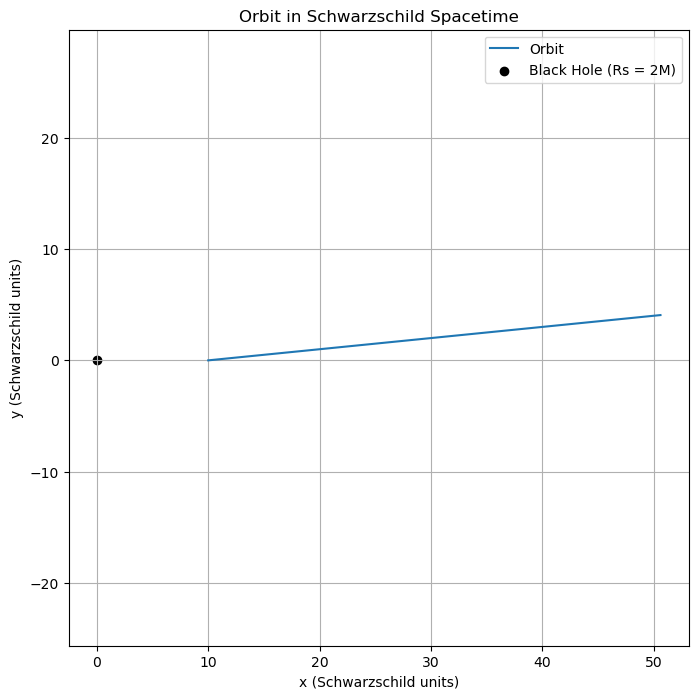

In [68]:
# Equations of motion for the Schwarzschild metric
M = 1 # in natural units
# params 
E_val = 1
L_val = 1
sigma_val = 0

Rs = 2*M # in natural units
f = 1 - Rs / r  
g = 1 / f
h = r**2

# equations of motion
tdot = E_val / f
phidot = L_val / h 
rdot_sq = (1/g) * ( (1/f)*E_val**2 - (sigma_val - L_val**2 / h) )

rdot = gr.s.sqrt(rdot_sq)

# orbit equation
drdphi = rdot / phidot

drdphi_func = gr.s.lambdify(r, drdphi, "numpy")

# Define the numerical function for solving the orbit
def orbit_eq(phi, r):
    return drdphi_func(r)

# Initial conditions
r0 = 10  # Initial radius
phi_span = (0, 10)
phi_vals = np.linspace(0,  10, 500)

# Solve numerically
sol = solve_ivp(orbit_eq, phi_span, [r0], t_eval=phi_vals, method="RK45")

# Convert to Cartesian coordinates
r_vals = sol.y[0]
phi_vals = sol.t
x_vals = r_vals * np.cos(phi_vals)
y_vals = r_vals * np.sin(phi_vals)

# Plot the orbit
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals, label="Orbit")
plt.scatter(0, 0, color="black", marker="o", label="Black Hole (Rs = 2M)")
plt.xlabel("x (Schwarzschild units)")
plt.ylabel("y (Schwarzschild units)")
plt.title("Orbit in Schwarzschild Spacetime")
plt.legend()
plt.grid()
plt.axis("equal")
plt.show()